In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [17]:
# Read from excel file
df = pd.read_excel('data/third_test_6-04-03T1341/third_test_6.xlsx', sheet_name='Sheet1')

In [18]:
source_in_current = df[["Source in Current (A)"]].to_numpy() # Transmit end 120V in Nasa source
source_in_voltage = df[["Source in Voltage (V)"]].to_numpy()
bcm_lv_in_voltage = df[["BCM LV IN Voltage (V)"]].to_numpy() # Transmit end BCM low voltage input
bcm_lv_in_current = df[["BCM LV IN Current (A)"]].to_numpy()
transmit_battery_voltage = df[["Transmit Battery Voltage (V)"]].to_numpy() # Transmit end 48V battery pack
transmit_battery_current = df[["Transmit Battery Current (A)"]].to_numpy()
line_voltage_400 = df[["400 Line Voltage (V)"]].to_numpy() # Transmit end 400V line out of board
line_current_400 = df[["400 Line Current (A)"]].to_numpy()
load_side_voltage = df[["Load Side Voltage (V)"]].to_numpy()
load_side_current = df[["Load Side Current (A)"]].to_numpy()
load_battery_voltage = df[["Load Battery Voltage (V)"]].to_numpy()
load_battery_current = df[["Load Battery Current (A)"]].to_numpy()
bcm_voltage_in = df[["BCM Voltage In (V)"]].to_numpy()
bcm_voltage_out = df[["BCM Voltage Out (V)"]].to_numpy()
bcm_current_in = df[["BCM Current In (A)"]].to_numpy()
bcm_current_out_1 = df[["BCM Current Out (A)"]].to_numpy()
source_victron_voltage_1 = df[["Source Victron Voltage (V)"]].to_numpy() # Transmit end Victron
source_victron_current = df[["Source Victron Current (A)"]].to_numpy()
source_victron_vpv = df[["Source Victron VPV (V)"]].to_numpy()
source_victron_wpv = df[["Source Victron WPV (W)"]].to_numpy()
load_victron_voltage = df[["Load Victron Voltage (V)"]].to_numpy() # Load end Victron
load_victron_current = df[["Load Victron Current (A)"]].to_numpy()
load_victron_vpv = df[["Load Victron VPV (V)"]].to_numpy()
load_victron_wpv = df[["Load Victron WPV (W)"]].to_numpy()
bk_load_voltage = df[["BK Load Voltage (V)"]].to_numpy()
bk_load_current = df[["BK Load Current (A)"]].to_numpy()
bk_load_power_1 = df[["BK Load Power (W)"]].to_numpy()
ps_voltage_1 = df[["PS Voltage (V)"]].to_numpy()
ps_current = df[["PS Current (A)"]].to_numpy()
ps_power = df[["PS Power (W)"]].to_numpy()
#bcm_current_out_2 = df[["BCM Current Out (A)"]].to_numpy()
#source_victron_voltage_2 = df[["Source Victron Voltage (V)"]].to_numpy()
#bk_load_power_2 = df[["BK Load Power (W)"]].to_numpy()
#ps_voltage_2 = df[["PS Voltage (V)"]].to_numpy()


(-150.0, 150.0)

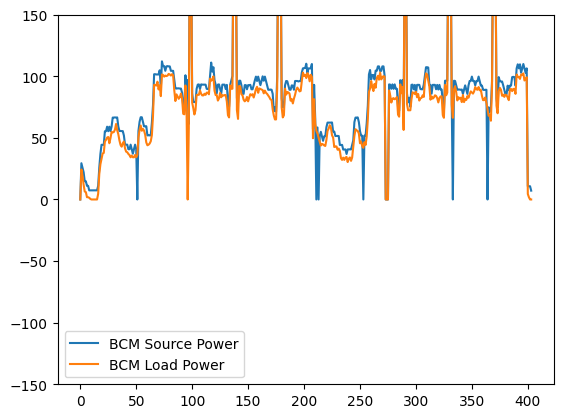

In [19]:
bcm_source_power = np.multiply(transmit_battery_voltage, bcm_lv_in_current) # Transmit end BCM Output Power
bcm_load_power = np.multiply(bcm_voltage_out, bcm_current_out_1) # Load end BCM output Power
#plt.plot(bcm_source_power, label='BCM Source Power')
plt.plot(np.multiply(bcm_voltage_in, bcm_current_in), label='BCM Source Power')
plt.plot(bcm_load_power, label='BCM Load Power')
#plt.plot(np.add(bcm_source_power, bcm_load_power), label='BCM Power Loss')
plt.legend()
plt.ylim(-150, 150)

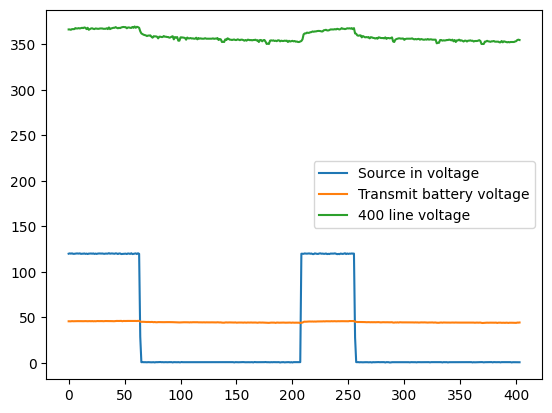

In [20]:
# Plot transmit side batteries
#plt.plot(source_in_current, label="Source in current")
plt.plot(source_in_voltage, label="Source in voltage")
##plt.plot(transmit_battery_current, label="Transmit battery current")
plt.plot(transmit_battery_voltage, label="Transmit battery voltage")
# Power out of the 400 volt line
plt.plot(line_voltage_400, label="400 line voltage")
#plt.plot(line_current_400, label="400 line current")
plt.legend()

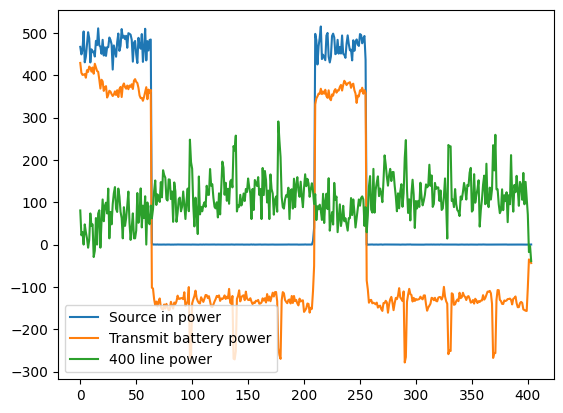

In [21]:
# multiply the voltage and current to get the power
# power = voltage * current
source_in_power = np.multiply(source_in_voltage, source_in_current)
plt.plot(source_in_power, label="Source in power") # NASA source in 120 V power

transmit_battery_power = np.multiply(transmit_battery_voltage, transmit_battery_current)
plt.plot(transmit_battery_power, label = "Transmit battery power")

line_power = np.multiply(line_voltage_400, -1 *line_current_400)
plt.plot(line_power, label="400 line power")
#plt.xlim(100, 150)
plt.legend()

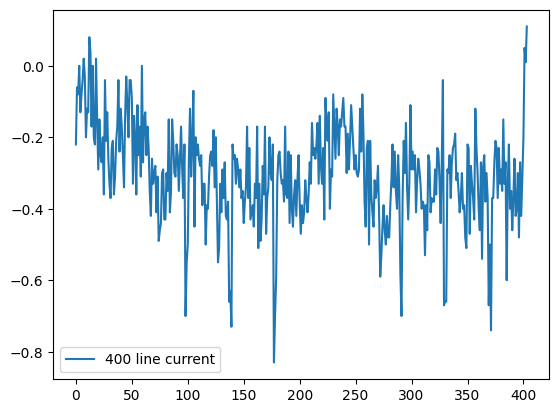

In [26]:
#plt.plot(line_voltage_400, label="400 line voltage")
plt.plot(line_current_400, label="400 line current")
plt.legend()

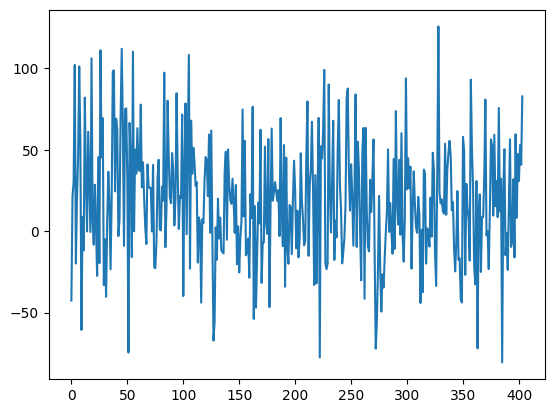

In [22]:
batt_load_sum = np.add(transmit_battery_power, line_power)
total_source_sum = np.subtract(source_in_power, batt_load_sum)
plt.plot(total_source_sum, label="Total source sum")

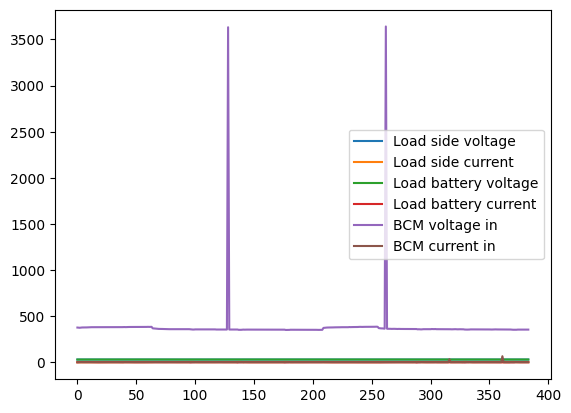

In [9]:
# 400 v and i in
# battery v i
# load v i
plt.plot(load_side_voltage, label="Load side voltage")
plt.plot(load_side_current, label="Load side current")
plt.plot(load_battery_voltage, label="Load battery voltage")
plt.plot(load_battery_current, label="Load battery current")
plt.plot(bcm_voltage_in, label="BCM voltage in")
plt.plot(bcm_current_in, label="BCM current in")
plt.plot()
plt.legend()

(-100.0, 200.0)

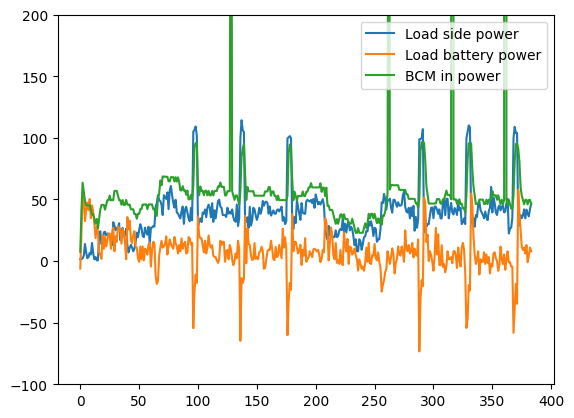

In [10]:
load_side_power = np.multiply(load_side_voltage, load_side_current)
plt.plot(load_side_power, label="Load side power")

load_battery_power = np.multiply(load_battery_voltage, load_battery_current)
plt.plot(load_battery_power, label="Load battery power")

bcm_in_power = np.multiply(bcm_voltage_in, bcm_current_in)
plt.plot(bcm_in_power, label="BCM in power")

bcm_out_power = np.multiply(bcm_voltage_out, bcm_current_out_1)
#plt.plot(bcm_out_power, label="BCM out power")
plt.legend()
plt.ylim(-100, 200)

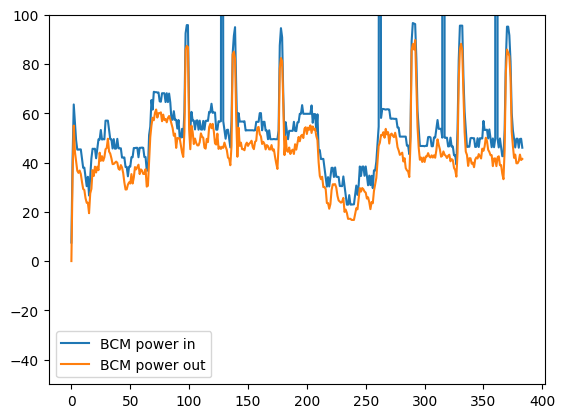

In [16]:
plt.plot(bcm_in_power, label="BCM power in")
plt.plot(bcm_out_power, label="BCM power out")
plt.ylim(-50, 100)
plt.legend()

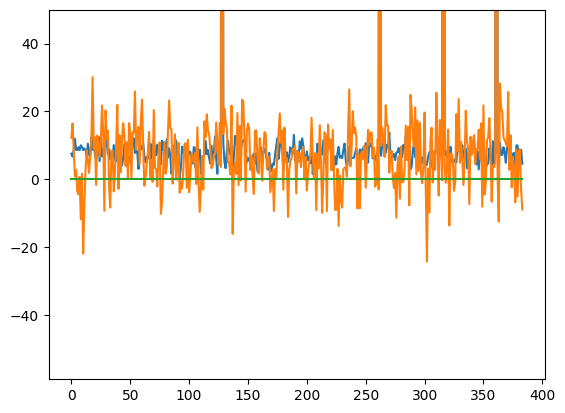

In [12]:
load_power_out = np.add(load_side_power, load_battery_power)
total_load_sum = np.subtract(bcm_in_power, load_power_out)
bcm_total = np.subtract(bcm_in_power, bcm_out_power)
plt.plot(bcm_total, label="BCM total")
plt.plot(total_load_sum, label="Total load sum")
plt.ylim(-59, 50)
# plot an array of zeros to make the graph look better
plt.plot(np.zeros(len(total_load_sum)), label="Zero line")

In [13]:
plt.pl

AttributeError: module 'matplotlib.pyplot' has no attribute 'pl'

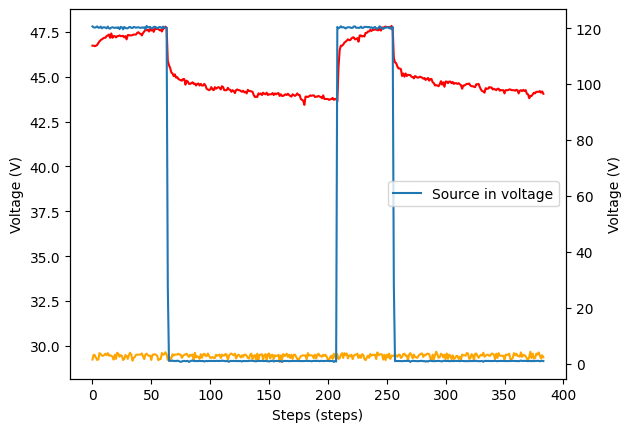

In [ ]:
# Plotting both battery voltages
#plt.plot(transmit_battery_voltage, label = "Transmit battery voltage")
#plt.plot(load_battery_voltage, label = "Load battery voltage")
#plt.plot(source_in_voltage, label = "Source in voltage")
#plt.legend()

# Create the figure and the first axis
fig, ax1 = plt.subplots()

ax1.plot(transmit_battery_voltage, label = "Transmit battery voltage", color = "red")
ax1.plot(load_battery_voltage, label = "Load battery voltage", color = "orange")
ax1.set_xlabel('Steps (steps)') 
ax1.set_ylabel('Voltage (V)')

# Create the second axis
ax2 = ax1.twinx()

# Plot the second axis
ax2.plot(source_in_voltage, label = "Source in voltage")
ax2.set_ylabel('Voltage (V)')
ax2.legend()

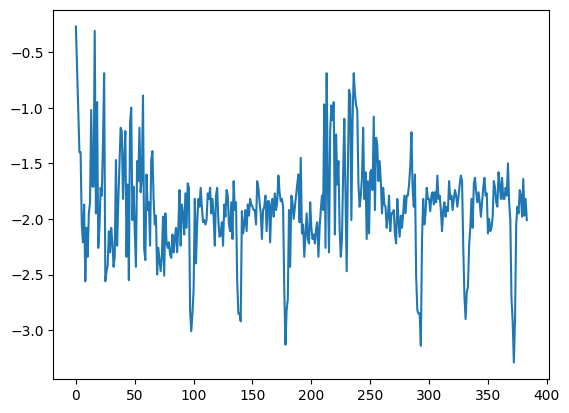

In [ ]:
#plt.plot(source_in_current)
#plt.plot(source_in_voltage)
#plt.plot(bcm_lv_in_voltage)
plt.plot(bcm_lv_in_current)


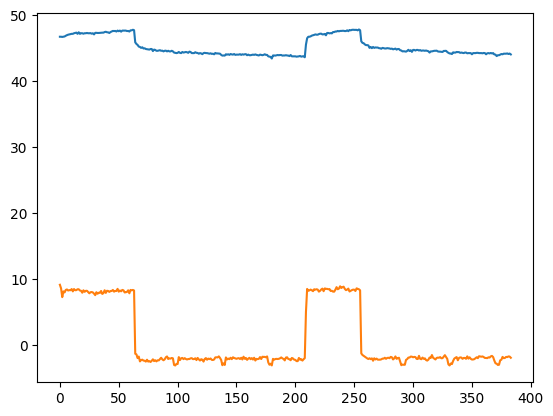

In [ ]:
plt.plot(transmit_battery_voltage)
plt.plot(transmit_battery_current)

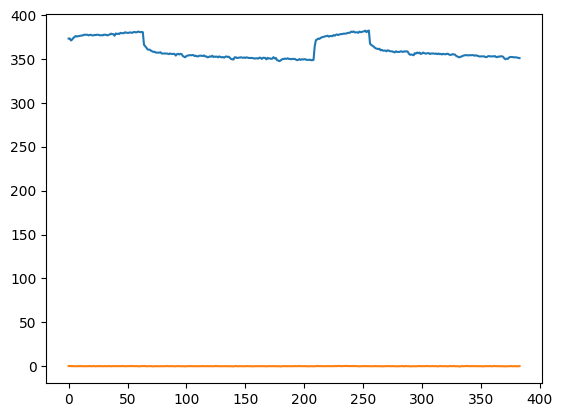

In [ ]:
plt.plot(line_voltage_400)
plt.plot(line_current_400)

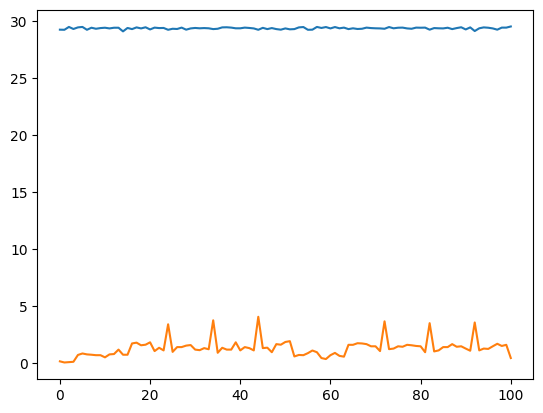

In [ ]:
plt.plot(load_side_voltage)
plt.plot(load_side_current)

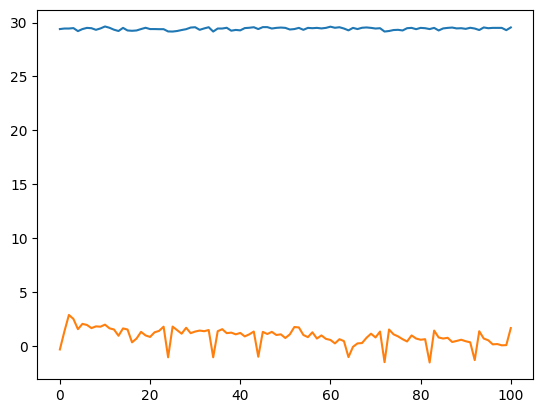

In [ ]:
plt.plot(load_battery_voltage)
plt.plot(load_battery_current)

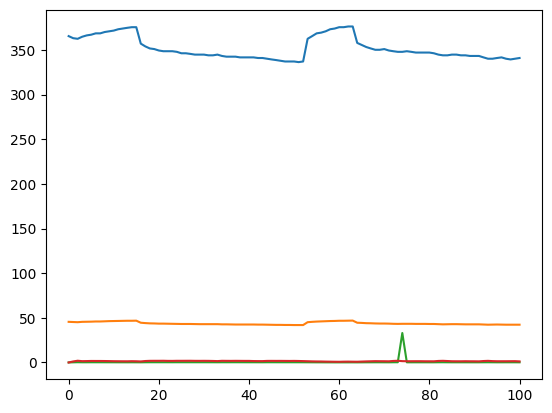

In [ ]:
plt.plot(bcm_voltage_in)
plt.plot(bcm_voltage_out)
plt.plot(bcm_current_in)
plt.plot(bcm_current_out_1)

In [ ]:
# power between source bcm and power between bcm load